In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
# 데이터 인덱스 뷰 키우기
pd.set_option('display.max_row', 600)

# 모든 데이터 내용 다 보이게하기
pd.set_option('display.max_colwidth', 50)

#모든 컬럼 다 보이게 하기
pd.options.display.max_columns = None

In [3]:
os.chdir('C:/Users/sonso/Desktop/Python')

In [5]:
os.listdir()

['.ipynb_checkpoints',
 '20200905.ipynb',
 'Kaggle',
 'NIPA',
 'SCDC',
 '[Track1_데이터1] mrc_info.csv',
 '[Track1_데이터2] samp_train.csv',
 '[Track1_데이터3] samp_cst_feat.csv',
 '[Track1_데이터4] variable_dtype.xlsx',
 '삼성카드',
 '패캠']

In [6]:
df1 = pd.read_csv("[Track1_데이터1] mrc_info.csv", encoding='cp949')
df2 = pd.read_csv("[Track1_데이터2] samp_train.csv")
df3 = pd.read_csv("[Track1_데이터3] samp_cst_feat.csv")

key = pd.merge(df2, df1, on = "MRC_ID_DI")
df = pd.merge(key, df3, on = "cst_id_di")
# 온라인 가맹점 번호 = label
df = df.rename({"cst_id_di":"고객관리번호", 'MRC_ID_DI':"label", 'Category':"업종"}, axis=1)

df_x = df.drop(["고객관리번호","업종","label"],axis = 1)
df_y = df[['label']]

In [12]:
#feature만 남기기
x = df[df.columns.difference(['고객관리번호','label','업종'])]

#label 포함 
df_label = df[df.columns.difference(['고객관리번호','업종'])]

In [8]:
feature = list(x)

In [ ]:
# 오류 남
f, ax = plt.subplots(226,1,figsize = (12,5))
for j in feature : 
    for i in range(0,11) :
        sns.kdeplot(df_label[df_label['label']== i][j], ax = ax[feature.index(j),1], label = i)
plt.show()
    

In [15]:
# 잘라서 쓰기
feature_30 = list(x)[0:30]
feature_30

['VAR002',
 'VAR003',
 'VAR004',
 'VAR005',
 'VAR006',
 'VAR007',
 'VAR008',
 'VAR009',
 'VAR010',
 'VAR011',
 'VAR012',
 'VAR013',
 'VAR014',
 'VAR015',
 'VAR016',
 'VAR017',
 'VAR018',
 'VAR019',
 'VAR020',
 'VAR021',
 'VAR022',
 'VAR023',
 'VAR024',
 'VAR025',
 'VAR026',
 'VAR027',
 'VAR028',
 'VAR029',
 'VAR030',
 'VAR031']

In [10]:
# color 차트 만들기
color =['black', 'red', 'sandybrown', 'olivedrab', 'chartreuse', 'forestgreen', 'salmon', 'deepskyblue', 'goldenrod', 'turquoise', 'darkorchid']

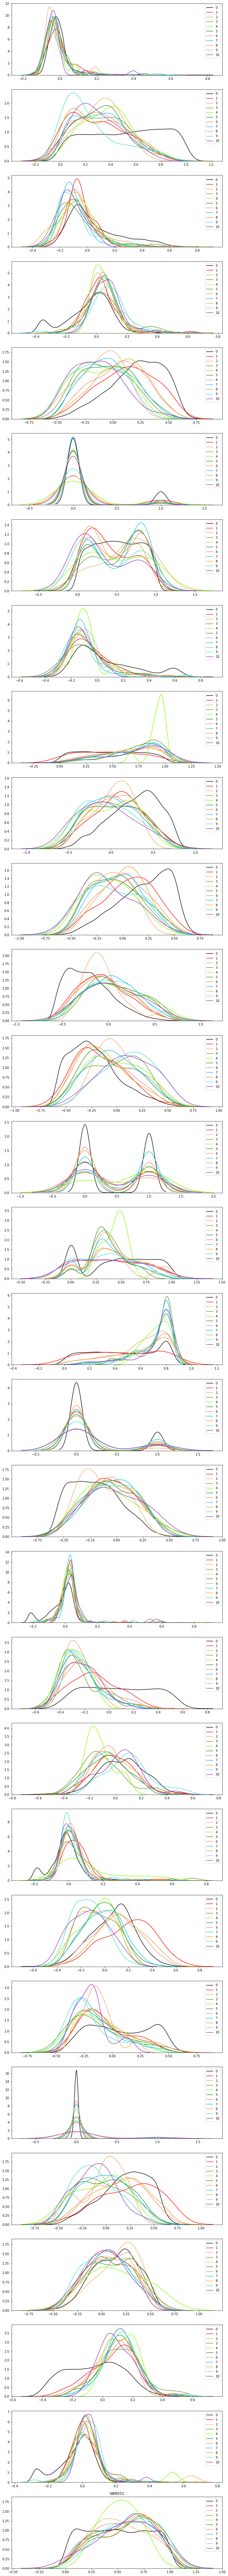

In [16]:
# 각 변수 별 title 만들고 싶은데 안됨
f, ax = plt.subplots(30,1,figsize = (12,5*30)) 
for j in feature_30 : 
    for i in range(0,11) :
        sns.kdeplot(df_label[df_label['label']==i][j], ax = ax[feature.index(j),] , label = i, color = color[i])
    plt.title(j)
plt.show()